<H1>SPAM DETECTION</H1>

In [1]:
import pandas as pd
import numpy as np

<h3>READING CSV</h3>

In [2]:
df=pd.read_csv('combined_data.csv')

In [44]:
df.head()

,label,text
0,1,ounce feather bowl hummingbird opec moment ala...
1,1,wulvob get your medircations online qnb ikud v...
2,0,computer connection from cnn com wednesday es...
3,1,university degree obtain a prosperous future m...
4,0,thanks for all your answers guys i know i shou...


In [4]:
#checking whether there is any null value or not
df.isna().sum()

label    0
text     0
dtype: int64

In [5]:
df.shape

(83448, 2)

<H3>TOTAL OF 83000 SAMPLES</H3>

In [6]:
x=df['text']
y=df['label']

In [7]:
import seaborn as sns

<H3>VISUALIZING THE COUNTS</H3>

C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Harshal\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will rai

<Axes: ylabel='count'>

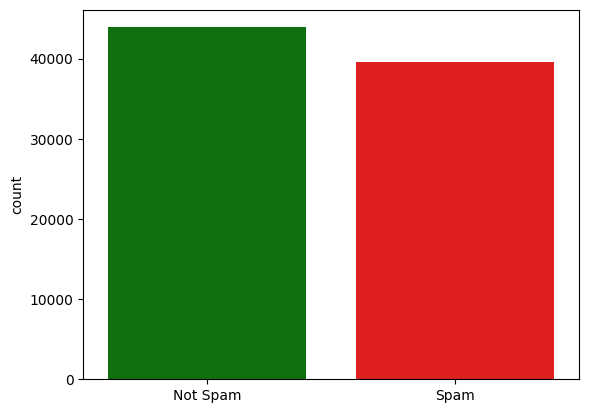

In [8]:
label_counts = df['label'].value_counts()
sns.barplot(x=['Not Spam', 'Spam'], y=label_counts, palette=['green', 'red'])


<H3>SPLITING OF DATA IN 70-30</H3>

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
# spliting the dataset into training and testing where testing size is 30 and training size is 70
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)
print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(xtest.shape)

(58413,)
(25035,)
(58413,)
(25035,)


In [11]:
# using logistic regression as it is classification problem

from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [13]:
# turning non nuerical into numerical
feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english',lowercase=True)
ftrain = feature_extraction.fit_transform(xtrain)
ftest  = feature_extraction.transform(xtest)
ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

In [14]:
# training model
lr.fit(ftrain,ytrain)

LogisticRegression()

In [15]:
ypred=lr.predict(ftest)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
acc=accuracy_score(ypred,ytest)
print(acc)

0.9833832634311963


In [18]:
# lets try on custom data

In [19]:
samples = ["Hello! you Loan Application was approved."]

sample_features = feature_extraction.transform(samples)



In [20]:
pred=lr.predict(sample_features)

In [21]:
if pred==0:
    print("NOT A SPAM MAIL")
else:
    print("IT IS A SPAM MAIL BLOCK IT!!!")

IT IS A SPAM MAIL BLOCK IT!!!


In [24]:

joblib.dump(feature_extraction, 'vectorizer.pkl')

['vectorizer.pkl']

In [25]:
joblib.dump(lr, 'model.pkl')

['model.pkl']

<H1>GUI</H1>

In [47]:
import tkinter as tk
from tkinter import messagebox
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer



def predict_spam():
    input_text = entry.get()

    if not input_text:
        messagebox.showwarning("Warning", "Please enter the content of the email.")
        return

    sample = feature_extraction.transform([input_text])
    prediction = model.predict(sample)

    # Display the prediction
    if prediction == 1:
        result_label.config(text="Prediction: Spam",font=("Arial", 14), fg="red")
    else:
        result_label.config(text="Prediction: Not Spam",font=("Arial", 14), fg="green")
    


window = tk.Tk()
window.title("Spam Detection")

window.geometry("500x300")

title_label = tk.Label(window,bg="yellow", text="SPAM CLASSIFIER", font=("Times New Roman", 20, "bold"))
title_label.pack(pady=5)

developer_label = tk.Label(window,bg="yellow", text="Developed by: Harshal Mali", font=("Arial", 10))
developer_label.pack(pady=10)

tk.Label(window,font=("Arial",10), bg="yellow",text="Enter the content of the email:").pack(pady=10)
entry = tk.Entry(window, width=50)
entry.pack(pady=10)

predict_button = tk.Button(window, text="Predict", height=2,width=15,command=predict_spam)
predict_button.pack(side="bottom",pady=10,)

result_label = tk.Label(window, text="")
result_label.pack(pady=10)

window.configure(bg="yellow")

window.mainloop()
